In [3]:
from phimal_utilities.analysis import load_tensorboard
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
df_single_threshold = load_tensorboard('testruns/cluster/')
df_single_cluster = load_tensorboard('testruns/threshold/')

/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

(0, 1000)

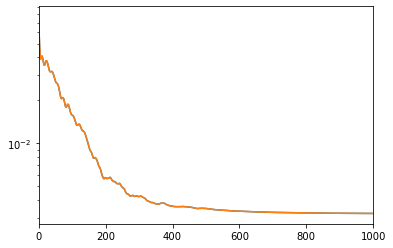

In [6]:
plt.semilogy(df_single_cluster.index, df_single_cluster.MSE_0)
plt.semilogy(df_single_threshold.index, df_single_threshold.MSE_0)

plt.xlim([0, 1000])

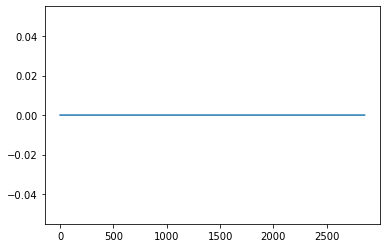

In [7]:
plt.plot(np.abs(df_single_cluster.MSE_0 - df_single_threshold.MSE_0))

(0, 2000)

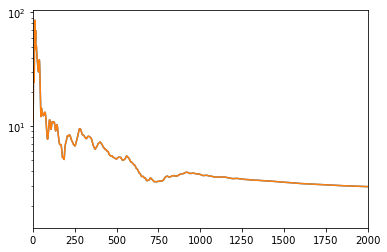

In [8]:
plt.semilogy(df_single_cluster.index, df_single_cluster.L1_0)
plt.semilogy(df_single_threshold.index, df_single_threshold.L1_0)

plt.xlim([0, 2000])

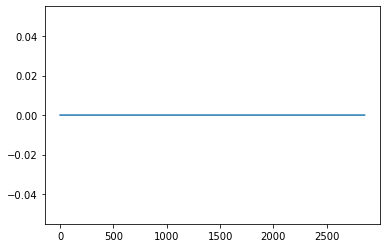

In [9]:
plt.plot(np.abs(df_single_cluster.L1_0 - df_single_threshold.L1_0))

# Checking non-convergence

In [1]:
import numpy as np

from phimal_utilities.data import Dataset
from phimal_utilities.data.burgers import BurgersDelta
from phimal_utilities.analysis import load_tensorboard

from copy import copy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context='paper', style='white')

%config InlineBackend.figure_format = 'svg'

In [2]:
df_cluster = pd.read_pickle('data/cluster_collected.pd')
df_cluster = df_cluster.sort_values(by=['noise', 'run'])
df_cluster = df_cluster.reset_index(drop=True)

In [20]:
coeff_keys = [key for key in df_cluster.keys() if key[:5]=='coeff']
scaled_coeff_keys = [key for key in df_cluster.keys() if key[:6]=='scaled']
ini_keys = [key for key in df_cluster.keys() if key[:3]=='ini']

In [4]:
df_cluster.query('first_sparsity == -1')

,noise,run,first_sparsity,Total_loss,MSE_0,Regression_0,L1_0,coeff_0_0,coeff_0_1,coeff_0_2,...,ini_scaled_coeff_0_2,ini_scaled_coeff_0_3,ini_scaled_coeff_0_4,ini_scaled_coeff_0_5,ini_scaled_coeff_0_6,ini_scaled_coeff_0_7,ini_scaled_coeff_0_8,ini_scaled_coeff_0_9,ini_scaled_coeff_0_10,ini_scaled_coeff_0_11
21,0.20,1,-1,-9.404669,0.001442,0.000003,2.797988,0.000826,0.018031,0.085771,...,0.543396,-0.124145,-0.038641,-1.082446,0.359384,0.147447,0.079212,0.081743,-0.241382,-0.060896
42,0.40,2,-1,-6.615659,0.005814,0.000020,2.819074,0.002133,-0.010369,0.089877,...,0.550335,-0.189401,0.010003,-1.028435,0.200997,0.285131,-0.050396,0.132076,-0.217267,-0.120222
46,0.45,1,-1,-6.125638,0.007434,0.000014,5.164794,0.000572,0.044331,0.059872,...,0.396115,-0.250011,0.082785,-1.372513,1.063003,0.313953,-0.070985,0.453196,-1.048576,0.026721
56,0.55,1,-1,-5.402029,0.010671,0.000028,3.500176,0.000196,-0.066587,0.100596,...,0.723594,0.016879,0.204574,-0.593960,-0.624005,0.239148,-0.405674,-0.114006,0.254585,-0.192425
59,0.55,4,-1,-5.424809,0.010547,0.000034,3.428565,0.002219,0.007204,0.077088,...,0.522666,-0.237302,0.090606,-1.126358,0.264541,0.340274,-0.156254,0.221800,-0.351575,-0.088717
67,0.65,2,-1,-4.745288,0.014819,0.000039,5.184490,0.004876,0.065131,0.072094,...,0.457218,-0.416553,-0.123615,-1.466298,0.909614,0.369939,0.220070,0.334612,-0.694799,-0.033358
68,0.65,3,-1,-4.699982,0.015153,0.000052,4.517958,-0.001908,0.129879,0.105913,...,0.633246,-0.301714,-0.097142,-1.332593,0.696873,-0.225845,0.287385,-0.188909,-0.366126,0.153599
71,0.70,1,-1,-4.390371,0.017695,0.000049,4.857670,-0.001699,-0.060082,0.074558,...,0.517852,-0.725181,0.235036,-0.837826,-0.194045,1.195385,-0.376809,0.003110,0.058103,-0.582844
76,0.75,1,-1,-4.154790,0.019914,0.000043,6.259877,0.000509,0.015489,0.076532,...,0.525213,-0.727319,0.118680,-1.555449,0.602714,0.950289,-0.140906,0.644246,-0.661965,-0.297302
79,0.75,4,-1,-4.103479,0.020437,0.000032,5.358263,-0.003784,0.032491,0.058402,...,0.383510,-0.535120,0.055843,-1.469498,0.798547,0.630512,-0.056961,0.461107,-0.694734,-0.174504


In [71]:
noise = 1.0
run = 2

df_single = load_tensorboard(f'runs_correct/cluster_{noise:.2f}_run_{run}/')

In [72]:
df_single.keys()

Index(['Total_loss', 'MSE_0', 'Regression_0', 'L1_0', 'coeff_0_0', 'coeff_0_1',
       'coeff_0_2', 'coeff_0_3', 'coeff_0_4', 'coeff_0_5', 'coeff_0_6',
       'coeff_0_7', 'coeff_0_8', 'coeff_0_9', 'coeff_0_10', 'coeff_0_11',
       'scaled_coeff_0_0', 'scaled_coeff_0_1', 'scaled_coeff_0_2',
       'scaled_coeff_0_3', 'scaled_coeff_0_4', 'scaled_coeff_0_5',
       'scaled_coeff_0_6', 'scaled_coeff_0_7', 'scaled_coeff_0_8',
       'scaled_coeff_0_9', 'scaled_coeff_0_10', 'scaled_coeff_0_11'],
      dtype='object')

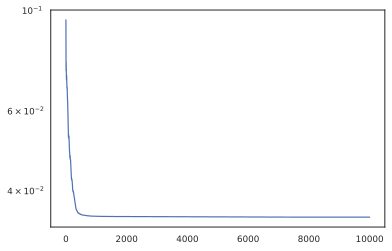

In [73]:
plt.semilogy(df_single.index, df_single.MSE_0)

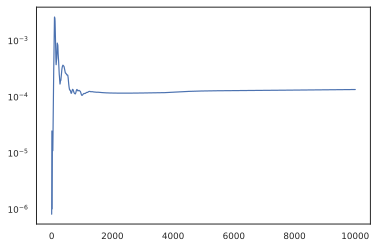

In [74]:
plt.semilogy(df_single.index, df_single.Regression_0)

(0, 10)

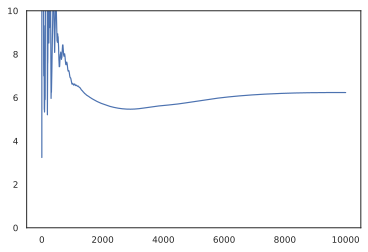

In [75]:
plt.plot(df_single.index, df_single.L1_0)
plt.ylim([0, 10])
#plt.xlim([0, 2000])

In [76]:
df_single.L1_0[500:].idxmin()

2906

(-2, 2)

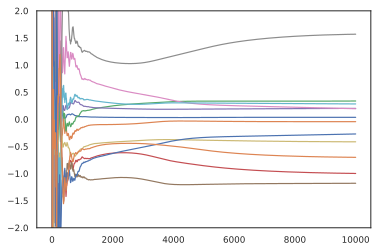

In [77]:
for key in scaled_coeff_keys:
    plt.plot(df_single.index, df_single[key])
plt.ylim([-2, 2])

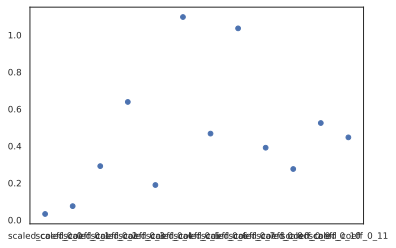

In [64]:
plt.plot(np.abs(df_single[scaled_coeff_keys]).loc[df_single.L1_0[500:].idxmin()], 'o')

# Old early stopper

In [168]:
noise = 1.0
run = 2

df_single = load_tensorboard(f'runs_final/threshold_0.00_run_0/')

In [169]:
df_single.keys()

Index(['Total_loss', 'MSE_0', 'Regression_0', 'L1_0', 'coeff_0_0', 'coeff_0_1',
       'coeff_0_2', 'coeff_0_3', 'coeff_0_4', 'coeff_0_5', 'coeff_0_6',
       'coeff_0_7', 'coeff_0_8', 'coeff_0_9', 'coeff_0_10', 'coeff_0_11',
       'scaled_coeff_0_0', 'scaled_coeff_0_1', 'scaled_coeff_0_2',
       'scaled_coeff_0_3', 'scaled_coeff_0_4', 'scaled_coeff_0_5',
       'scaled_coeff_0_6', 'scaled_coeff_0_7', 'scaled_coeff_0_8',
       'scaled_coeff_0_9', 'scaled_coeff_0_10', 'scaled_coeff_0_11'],
      dtype='object')

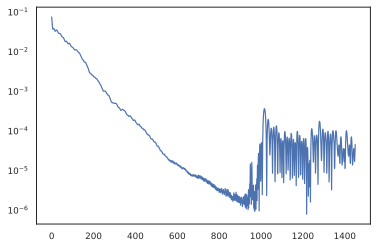

In [172]:
plt.semilogy(df_single.index, df_single.MSE_0)

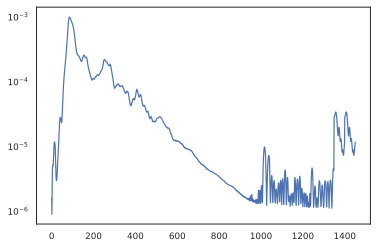

In [173]:
plt.semilogy(df_single.index, df_single.Regression_0)

(0, 2000)

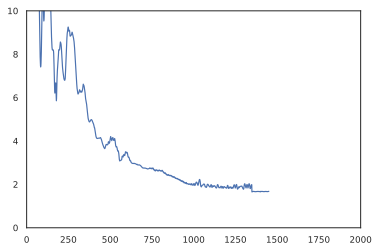

In [174]:
plt.plot(df_single.index, df_single.L1_0)
plt.ylim([0, 10])
plt.xlim([0, 2000])

In [175]:
df_single.L1_0[500:].idxmin()

1349

(1340, 1400)

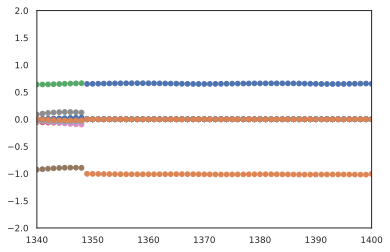

In [176]:
for key in scaled_coeff_keys:
    plt.plot(df_single.index, df_single[key], 'o')
plt.ylim([-2, 2])
plt.xlim([1340, 1400])

In [166]:
df_single[coeff_keys].loc[1241]

coeff_0_0     0.000000
coeff_0_1     0.000000
coeff_0_2     0.097446
coeff_0_3     0.000000
coeff_0_4     0.000000
coeff_0_5    -1.010305
coeff_0_6     0.000000
coeff_0_7     0.000000
coeff_0_8     0.000000
coeff_0_9     0.000000
coeff_0_10    0.000000
coeff_0_11    0.000000
Name: 1241, dtype: float64

# New

In [79]:
noise = 1.0
run = 2

df_single = load_tensorboard(f'testruns/cluster_{noise:.2f}_run_{run}/')

In [80]:
df_single.keys()

Index(['Total_loss', 'MSE_0', 'Regression_0', 'L1_0', 'coeff_0_0', 'coeff_0_1',
       'coeff_0_2', 'coeff_0_3', 'coeff_0_4', 'coeff_0_5', 'coeff_0_6',
       'coeff_0_7', 'coeff_0_8', 'coeff_0_9', 'coeff_0_10', 'coeff_0_11',
       'scaled_coeff_0_0', 'scaled_coeff_0_1', 'scaled_coeff_0_2',
       'scaled_coeff_0_3', 'scaled_coeff_0_4', 'scaled_coeff_0_5',
       'scaled_coeff_0_6', 'scaled_coeff_0_7', 'scaled_coeff_0_8',
       'scaled_coeff_0_9', 'scaled_coeff_0_10', 'scaled_coeff_0_11'],
      dtype='object')

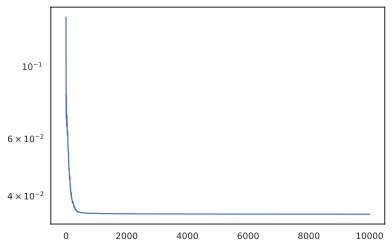

In [81]:
plt.semilogy(df_single.index, df_single.MSE_0)

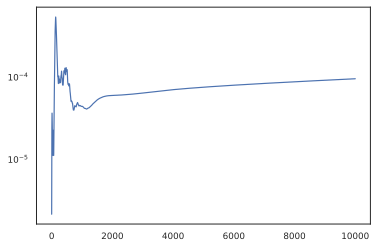

In [82]:
plt.semilogy(df_single.index, df_single.Regression_0)

(0, 10)

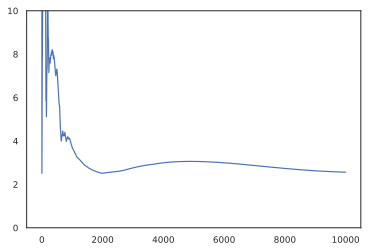

In [83]:
plt.plot(df_single.index, df_single.L1_0)
plt.ylim([0, 10])
#plt.xlim([0, 2000])

In [84]:
df_single.L1_0[500:].idxmin()

1969

(-2, 2)

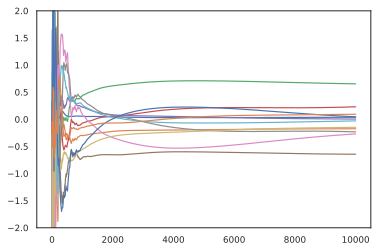

In [85]:
for key in scaled_coeff_keys:
    plt.plot(df_single.index, df_single[key])
plt.ylim([-2, 2])

# Comparing

In [103]:
run = 1

df_old = load_tensorboard(f'testruns/old_stop_cluster_run_{run}/')
df_new = load_tensorboard(f'testruns/new_stop_cluster_run_{run}/')

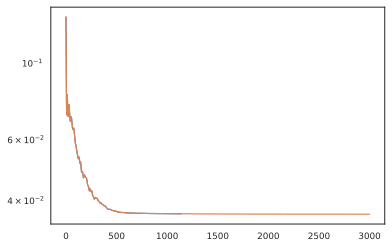

In [104]:
plt.semilogy(df_new.index, df_new.MSE_0)
plt.semilogy(df_old.index, df_old.MSE_0)

In [105]:
df_new.MSE_0 - df_old.MSE_0

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2996    NaN
2997    NaN
2998    NaN
2999    NaN
3000    NaN
Name: MSE_0, Length: 3001, dtype: float64

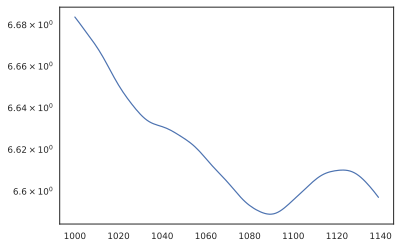

In [109]:
plt.semilogy(df_new.index[1000:], df_new.L1_0[1000:])

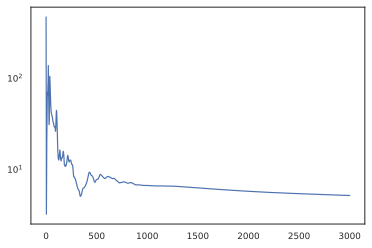

In [107]:
plt.semilogy(df_old.index, df_old.L1_0)

In [101]:
df_new.L1_0[500:].idxmin()

1089